### Determine the optimal K number
* Elbow method
* Average silhouette method

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#df = pd.read_csv('PHBsample11_ss.csv', low_memory=False)

In [19]:
# Use a smaller data set to save time
df_s = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [20]:
# drop the column resulted from sampling of the original data set
df_s.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df_s.shape

(59159, 1063)

In [21]:
# In order to run K-means, drop all the categoricald data for now.
df_s = df_s.select_dtypes(include=['float64', 'int64'])

In [6]:
df_s.shape

(59159, 907)

In [50]:
df_s.head()

,ValDate,IssDate,IssAgeALB,Dur,AttAge,JointInd,AV,CSV,SCPeriod,WDtoDate,...,Match4,tie3,HealthScore_C5,Surr,EligibleInd,WDResponse,FirstEligQInd,UtilizationInd,WDModelFilterIn,PolNum_UW
0,16343.0,16104.0,65.0,1.0,65.8,0.0,448559.96,421076.98,5,0.00,...,1.0,64.859049,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,294692
1,15613.0,14397.0,69.0,4.0,72.4,0.0,67321.31,64451.77,7,0.00,...,1.0,53.000000,0.869053,0.0,1.0,0.0,0.0,0.0,1.0,281394
2,16070.0,13518.0,55.0,7.0,62.6,0.0,301121.04,295758.92,7,56438.97,...,1.0,57.000000,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,475776
3,16343.0,14419.0,53.0,6.0,58.3,0.0,187344.04,180762.56,7,0.00,...,1.0,104.000000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,288738
4,15613.0,15044.0,63.0,2.0,65.2,0.0,183155.51,171789.66,6,1845.38,...,0.0,64.859049,0.869053,0.0,1.0,0.0,0.0,1.0,1.0,15320


In [51]:
df_s.columns.to_series().groupby(df_s.dtypes).groups

{dtype('int64'): Index(['SCPeriod', 'PurchasePrice_C1', 'PctLandValue_C1', 'YearBuilt_C1',
        'BuildingArea_C1', 'NoOfBuildings_C1', 'NoOfStories_C1', 'NoOfRooms_C1',
        'NoOfUnits_C1', 'Bedrooms_C1',
        ...
        'Population.16.Employed.Civilian.Occupation.Percent.White.Collar_C3',
        'Households.Average.Household.Income_C3',
        'Households.Median.Household.Income_C3',
        'Housing.Units.Percent.1.Unit.Detached_C3',
        'Housing.Units.Percent.5.Units_C3',
        'Housing.Units.Percent.Built.2000.to.2004_C3',
        'Housing.Units.Percent.Built.2005.or.Later_C3',
        'Occupied.Housing.Units.Average.Number.of.Vehicles.Available_C3',
        'Owner.Occupied.Housing.Units.Median.Value.Owner.Occupied.Housing.Units_C3',
        'PolNum_UW'],
       dtype='object', length=153),
 dtype('float64'): Index(['ValDate', 'IssDate', 'IssAgeALB', 'Dur', 'AttAge', 'JointInd', 'AV',
        'CSV', 'WDtoDate', 'WDCount',
        ...
        'i06txsb1_C4', 'Match4

In [22]:
df_s = df_s.fillna(df_s.mean())

In [23]:
df_s.isnull().sum()

ValDate             0
IssDate             0
IssAgeALB           0
Dur                 0
AttAge              0
JointInd            0
AV                  0
CSV                 0
SCPeriod            0
WDtoDate            0
WDCount             0
DeptoDate           0
GMDBInd             0
AVPctEq             0
Pol_TermDt          0
Death               0
PurchaseDt_C1       0
PurchasePrice_C1    0
PctLandValue_C1     0
YearBuilt_C1        0
LotSize_C1          0
BuildingArea_C1     0
NoOfBuildings_C1    0
NoOfStories_C1      0
NoOfRooms_C1        0
NoOfUnits_C1        0
Bedrooms_C1         0
Baths_C1            0
PartialBaths_C1     0
NoOfCars_C1         0
                   ..
i12ccne1_C4         0
i03ccpe1_C4         0
i12ccpe1_C4         0
i03cctl1_C4         0
i12cctl1_C4         0
i12ccnl2_C4         0
i12ccnl1_C4         0
i99bcnl1_C4         0
i12bctu1_C4         0
i01bcnt1_C4         0
i24txtb1_C4         0
i99atpb1_C4         0
i24hesu1_C4         0
i06fisl1_C4         0
i12mtsq1_C

In [24]:
X = df_s.values
X.shape

(59159, 907)

In [25]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [9]:
# kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [58]:
# kmeans.labels_

array([2, 5, 1, ..., 6, 5, 5], dtype=int32)

In [59]:
# kmeans.inertia_

2.3354450906000497e+24

The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.[1] Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.[2]

Reference: https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method

01:01:02.98


Text(0.5,1,'Variance Explained vs. k')

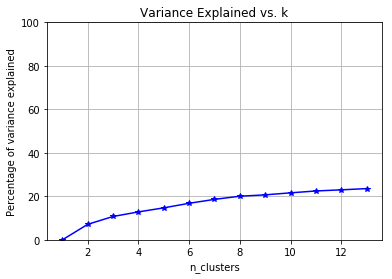

In [32]:
# Reference: https://github.com/sarguido/k-means-clustering/blob/master/k-means-clustering.ipynb
import time
start = time.time()
# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(X) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(X)**2)/X.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

In [ ]:
# from sklearn.metrics import silhouette_score
# labels = [model.labels_ for model in k_means_var]
# score = [silhouette_score(X, label, metric='euclidean') for label in labels]
    
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_range, score, 'b*-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('n_clusters')
# plt.ylabel('Silhouetee score')
# plt.title('Silhouetee score vs. k')